In [1]:
# Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ed = pd.read_csv('FipsEducationsDA5020.csv')
ed.head()

,fips,year,percent_measure,percent,county_state,rural_urban_cont_code,description
0,1000,1970,percent_four_plus_years_college,7.8,AL | Alabama,NaN,NaN
1,1000,1970,percent_has_some_college,7.5,AL | Alabama,NaN,NaN
2,1000,1970,percent_hs_diploma,25.9,AL | Alabama,NaN,NaN
3,1000,1970,percent_less than_hs_diploma,58.7,AL | Alabama,NaN,NaN
4,1000,1980,percent_four_plus_years_college,12.2,AL | Alabama,NaN,NaN


In [3]:
# Put the categories in percent_measure as new columns and the observations in percent as their values

ed = ed.set_index(['fips','year','county_state','rural_urban_cont_code','description','percent_measure']).percent \
    .unstack().rename_axis(None, 1).reset_index()

In [4]:
ed.head()

,fips,year,county_state,rural_urban_cont_code,description,percent_four_plus_years_college,percent_has_some_college,percent_hs_diploma,percent_less than_hs_diploma
0,1000,1970,AL | Alabama,NaN,NaN,7.8,7.5,25.9,58.7
1,1000,1980,AL | Alabama,NaN,NaN,12.2,12.5,31.8,43.5
2,1000,1990,AL | Alabama,NaN,NaN,15.7,21.7,29.4,33.1
3,1000,2000,AL | Alabama,NaN,NaN,19.0,25.9,30.4,24.7
4,1000,2015,AL | Alabama,NaN,NaN,23.5,29.7,31.0,15.7


In [34]:
ed.columns

Index(['fips', 'year', 'county_state', 'rural_urban_cont_code', 'description',
       'percent_four_plus_years_college', 'percent_has_some_college',
       'percent_hs_diploma', 'percent_less than_hs_diploma'],
      dtype='object')

In [38]:
# Split county_state into 2 separate columns
ed[['State', 'County']] = ed['county_state'].str.split('|', expand = True)

In [89]:
ed.State = ed.State.str.strip()
ed.County = ed.County.str.strip()

In [90]:
ed.head()

,fips,year,county_state,rural_urban_cont_code,description,percent_four_plus_years_college,percent_has_some_college,percent_hs_diploma,percent_less than_hs_diploma,State,County
0,1000,1970,AL | Alabama,NaN,NaN,7.8,7.5,25.9,58.7,AL,Alabama
1,1000,1980,AL | Alabama,NaN,NaN,12.2,12.5,31.8,43.5,AL,Alabama
2,1000,1990,AL | Alabama,NaN,NaN,15.7,21.7,29.4,33.1,AL,Alabama
3,1000,2000,AL | Alabama,NaN,NaN,19.0,25.9,30.4,24.7,AL,Alabama
4,1000,2015,AL | Alabama,NaN,NaN,23.5,29.7,31.0,15.7,AL,Alabama


In [91]:
# Making 3 subsets of education, fips and rural_urban_code from the dataframe

# Education
education = ed.loc[:, ['fips','year','percent_four_plus_years_college','percent_has_some_college','percent_hs_diploma','percent_less than_hs_diploma']]
education.head()

,fips,year,percent_four_plus_years_college,percent_has_some_college,percent_hs_diploma,percent_less than_hs_diploma
0,1000,1970,7.8,7.5,25.9,58.7
1,1000,1980,12.2,12.5,31.8,43.5
2,1000,1990,15.7,21.7,29.4,33.1
3,1000,2000,19.0,25.9,30.4,24.7
4,1000,2015,23.5,29.7,31.0,15.7


In [92]:
# Fips
fips = ed.loc[:, ['fips','State','County']]
fips.head()

,fips,State,County
0,1000,AL,Alabama
1,1000,AL,Alabama
2,1000,AL,Alabama
3,1000,AL,Alabama
4,1000,AL,Alabama


In [93]:
# rural_urban_code
rural_urban_code = ed.loc[:,['fips', 'rural_urban_cont_code', 'description']]
rural_urban_code.head()

,fips,rural_urban_cont_code,description
0,1000,NaN,NaN
1,1000,NaN,NaN
2,1000,NaN,NaN
3,1000,NaN,NaN
4,1000,NaN,NaN


In [96]:
# In the year 1970, what is the percent of the population not attaining a high school diploma for the Nantucket county in Massachusetts? 

ed[(ed.year==1970) & (ed.County=="Nantucket County")]

# In 1970, the percent of the population not attaining a high school diploma for Nantucket County is 33.7

# What about the year 2015?

ed[(ed.year==2015) & (ed.County=="Nantucket County")]

# In 2015, the percent of the population not attaining a high school diploma for Nantucket County is 5.2

,fips,year,county_state,rural_urban_cont_code,description,percent_four_plus_years_college,percent_has_some_college,percent_hs_diploma,percent_less than_hs_diploma,State,County
6205,25019,2015,MA | Nantucket County,7.0,"Urban population of 2,500 to 19,999, not adjac...",43.7,25.7,25.4,5.2,MA,Nantucket County


In [99]:
# What is the average percentage not receiving a high school diploma for the counties in Alabama for the year 2015?

al_no_dip = ed[(ed.year==2015) & (ed.State=="AL")]

In [100]:
al_no_dip

,fips,year,county_state,rural_urban_cont_code,description,percent_four_plus_years_college,percent_has_some_college,percent_hs_diploma,percent_less than_hs_diploma,State,County
4,1000,2015,AL | Alabama,NaN,NaN,23.5,29.7,31.0,15.7,AL,Alabama
9,1001,2015,AL | Autauga County,2.0,"Counties in metro areas of 250,000 to 1 millio...",23.2,30.4,33.5,12.8,AL,Autauga County
14,1003,2015,AL | Baldwin County,3.0,"Counties in metro areas of fewer than 250,000 ...",29.0,31.8,28.8,10.5,AL,Baldwin County
19,1005,2015,AL | Barbour County,6.0,"Urban population of 2,500 to 19,999, adjacent ...",12.5,26.3,34.5,26.7,AL,Barbour County
24,1007,2015,AL | Bibb County,1.0,Counties in metro areas of 1 million populatio...,10.6,27.9,42.1,19.3,AL,Bibb County
29,1009,2015,AL | Blount County,1.0,Counties in metro areas of 1 million populatio...,12.9,32.2,33.4,21.5,AL,Blount County
34,1011,2015,AL | Bullock County,6.0,"Urban population of 2,500 to 19,999, adjacent ...",13.9,17.7,33.3,35.1,AL,Bullock County
39,1013,2015,AL | Butler County,6.0,"Urban population of 2,500 to 19,999, adjacent ...",14.5,25.6,37.7,22.2,AL,Butler County
44,1015,2015,AL | Calhoun County,3.0,"Counties in metro areas of fewer than 250,000 ...",17.6,31.5,31.8,19.1,AL,Calhoun County
49,1017,2015,AL | Chambers County,6.0,"Urban population of 2,500 to 19,999, adjacent ...",11.6,29.0,38.4,21.1,AL,Chambers County


In [101]:
al_no_dip['percent_less than_hs_diploma'].mean()

# 19.76 is the average percentage not receiving a high school diploma for the counties in Alabama for the year 2015

19.758823529411764

In [102]:
# What is the average percentage of college graduates for the counties in the state of Massachusetts for the year 2015?

ma_grad = ed[(ed.year==2015) & (ed.State=="MA")]

In [104]:
ma_grad['percent_four_plus_years_college'].mean()

# 38.53 is the average percentage of college graduates for the counties in the state of Massachusetts for the year 2015

38.526666666666664

In [105]:
#  Determine the average percentage of population not attaining a high school diploma for the counties in Alabama for each year within the dataset.

al = ed[(ed.State=="AL")]
al.groupby(['year']).mean()

,fips,rural_urban_cont_code,percent_four_plus_years_college,percent_has_some_college,percent_hs_diploma,percent_less than_hs_diploma
year,,,,,,
1970,1066.014706,4.641791,5.894118,5.877941,23.060294,65.158824
1980,1066.014706,4.641791,9.247059,10.082353,30.066176,50.620588
1990,1066.014706,4.641791,11.308824,18.350000,30.242647,40.100000
2000,1066.014706,4.641791,13.570588,23.360294,32.794118,30.264706
2015,1066.014706,4.641791,16.760294,28.075000,35.397059,19.758824


In [107]:
# What is the most common rural_urban code for the U.S. counties?

rural_urban_code.groupby(['rural_urban_cont_code']).count()

# 6 is the most common rural_urban code for US counties

,fips,description
rural_urban_cont_code,,
1.0,2153,2153
2.0,1890,1890
3.0,1779,1779
4.0,1070,1070
5.0,460,460
6.0,2961,2961
7.0,2165,2165
8.0,1097,1097
9.0,2091,2091


In [116]:
# Write code to see which counties have not been coded with a rural urban code

null = ed[ed['rural_urban_cont_code'].isnull()]
null.groupby(['County']).sum()

,fips,year,rural_urban_cont_code,percent_four_plus_years_college,percent_has_some_college,percent_hs_diploma,percent_less than_hs_diploma
County,,,,,,,
Alabama,5000,9955,0.0,78.2,97.3,148.5,175.7
Alaska,10000,9955,0.0,110.9,144.4,161.0,83.8
Arizona,20000,9955,0.0,101.3,133.9,140.7,123.8
Arkansas,25000,9955,0.0,68.6,92.6,160.5,178.2
California,30000,9955,0.0,114.4,128.9,127.3,129.1
Colorado,40000,9955,0.0,135.7,128.5,140.5,95.5
Connecticut,45000,9955,0.0,130.6,97.5,151.5,120.6
Delaware,50000,9955,0.0,107.0,101.6,163.1,128.3
District of Columbia,55000,9955,0.0,172.3,78.9,111.5,137.5


In [117]:
un = pd.read_csv('FipsUnemploymentDA5020.csv')
un.head()

,fips,year,percent_unemployed
0,1000,2007,4.0
1,1000,2008,5.7
2,1000,2009,11.0
3,1000,2010,10.5
4,1000,2011,9.6


In [118]:
un_ed = pd.merge(ed, un, how='inner', on = 'fips')
un_ed.head()

,fips,year_x,county_state,rural_urban_cont_code,description,percent_four_plus_years_college,percent_has_some_college,percent_hs_diploma,percent_less than_hs_diploma,State,County,year_y,percent_unemployed
0,1000,1970,AL | Alabama,NaN,NaN,7.8,7.5,25.9,58.7,AL,Alabama,2007,4.0
1,1000,1970,AL | Alabama,NaN,NaN,7.8,7.5,25.9,58.7,AL,Alabama,2008,5.7
2,1000,1970,AL | Alabama,NaN,NaN,7.8,7.5,25.9,58.7,AL,Alabama,2009,11.0
3,1000,1970,AL | Alabama,NaN,NaN,7.8,7.5,25.9,58.7,AL,Alabama,2010,10.5
4,1000,1970,AL | Alabama,NaN,NaN,7.8,7.5,25.9,58.7,AL,Alabama,2011,9.6


In [119]:
un_ed['percent_unemployed'].mean()

7.196209804660874

In [121]:
abv_un = un_ed[(un_ed.percent_unemployed >= un_ed['percent_unemployed'].mean())]
abv_un.sort_values('percent_unemployed', ascending=False)

,fips,year_x,county_state,rural_urban_cont_code,description,percent_four_plus_years_college,percent_has_some_college,percent_hs_diploma,percent_less than_hs_diploma,State,County,year_y,percent_unemployed
8818,6025,1970,CA | Imperial County,3.0,"Counties in metro areas of fewer than 250,000 ...",7.3,11.1,24.6,56.9,CA,Imperial County,2011,28.9
8836,6025,1990,CA | Imperial County,3.0,"Counties in metro areas of fewer than 250,000 ...",9.7,23.3,20.1,46.8,CA,Imperial County,2011,28.9
8827,6025,1980,CA | Imperial County,3.0,"Counties in metro areas of fewer than 250,000 ...",9.6,16.5,24.7,49.1,CA,Imperial County,2011,28.9
8845,6025,2000,CA | Imperial County,3.0,"Counties in metro areas of fewer than 250,000 ...",10.3,26.7,22.0,41.0,CA,Imperial County,2011,28.9
8854,6025,2015,CA | Imperial County,3.0,"Counties in metro areas of fewer than 250,000 ...",14.1,30.4,21.9,33.7,CA,Imperial County,2011,28.9
8853,6025,2015,CA | Imperial County,3.0,"Counties in metro areas of fewer than 250,000 ...",14.1,30.4,21.9,33.7,CA,Imperial County,2010,28.8
8817,6025,1970,CA | Imperial County,3.0,"Counties in metro areas of fewer than 250,000 ...",7.3,11.1,24.6,56.9,CA,Imperial County,2010,28.8
8835,6025,1990,CA | Imperial County,3.0,"Counties in metro areas of fewer than 250,000 ...",9.7,23.3,20.1,46.8,CA,Imperial County,2010,28.8
8826,6025,1980,CA | Imperial County,3.0,"Counties in metro areas of fewer than 250,000 ...",9.6,16.5,24.7,49.1,CA,Imperial County,2010,28.8
8844,6025,2000,CA | Imperial County,3.0,"Counties in metro areas of fewer than 250,000 ...",10.3,26.7,22.0,41.0,CA,Imperial County,2010,28.8


In [126]:
# In the year 2015, which fip counties, U.S. states contain a higher percentage of unemployed citizens than the percentage of college graduates?

higher_un = un_ed.query('percent_unemployed > percent_four_plus_years_college')

In [128]:
higher_un[(higher_un.year_x==2015)]
#al = ed[(ed.State=="AL")]

,fips,year_x,county_state,rural_urban_cont_code,description,percent_four_plus_years_college,percent_has_some_college,percent_hs_diploma,percent_less than_hs_diploma,State,County,year_y,percent_unemployed
173,1005,2015,AL | Barbour County,6.0,"Urban population of 2,500 to 19,999, adjacent ...",12.5,26.3,34.5,26.7,AL,Barbour County,2009,14.3
218,1007,2015,AL | Bibb County,1.0,Counties in metro areas of 1 million populatio...,10.6,27.9,42.1,19.3,AL,Bibb County,2009,13.3
219,1007,2015,AL | Bibb County,1.0,Counties in metro areas of 1 million populatio...,10.6,27.9,42.1,19.3,AL,Bibb County,2010,11.4
308,1011,2015,AL | Bullock County,6.0,"Urban population of 2,500 to 19,999, adjacent ...",13.9,17.7,33.3,35.1,AL,Bullock County,2009,15.6
353,1013,2015,AL | Butler County,6.0,"Urban population of 2,500 to 19,999, adjacent ...",14.5,25.6,37.7,22.2,AL,Butler County,2009,16.4
442,1017,2015,AL | Chambers County,6.0,"Urban population of 2,500 to 19,999, adjacent ...",11.6,29.0,38.4,21.1,AL,Chambers County,2008,14.4
443,1017,2015,AL | Chambers County,6.0,"Urban population of 2,500 to 19,999, adjacent ...",11.6,29.0,38.4,21.1,AL,Chambers County,2009,19.6
444,1017,2015,AL | Chambers County,6.0,"Urban population of 2,500 to 19,999, adjacent ...",11.6,29.0,38.4,21.1,AL,Chambers County,2010,14.9
445,1017,2015,AL | Chambers County,6.0,"Urban population of 2,500 to 19,999, adjacent ...",11.6,29.0,38.4,21.1,AL,Chambers County,2011,12.0
578,1023,2015,AL | Choctaw County,9.0,"Completely rural or less than 2,500 urban popu...",11.8,27.8,36.8,23.6,AL,Choctaw County,2009,13.5


In [129]:
# Which county, U.S. state and year that contains the highest percentage of college graduates in this dataset?
ed.sort_values('percent_four_plus_years_college', ascending=False)

,fips,year,county_state,rural_urban_cont_code,description,percent_four_plus_years_college,percent_has_some_college,percent_hs_diploma,percent_less than_hs_diploma,State,County
14823,51610,2015,VA | Falls Church city,1.0,Counties in metro areas of 1 million populatio...,78.8,11.4,7.5,2.3,VA,Falls Church city
14328,51013,2015,VA | Arlington County,1.0,Counties in metro areas of 1 million populatio...,72.9,12.3,8.3,6.5,VA,Arlington County
9173,35028,2015,NM | Los Alamos County,6.0,"Urban population of 2,500 to 19,999, adjacent ...",64.2,21.9,10.8,3.0,NM,Los Alamos County
14822,51610,2000,VA | Falls Church city,1.0,Counties in metro areas of 1 million populatio...,63.7,19.6,12.6,4.1,VA,Falls Church city
14773,51510,2015,VA | Alexandria city,1.0,Counties in metro areas of 1 million populatio...,61.4,18.0,12.1,8.5,VA,Alexandria city
6095,24027,2015,MD | Howard County,1.0,Counties in metro areas of 1 million populatio...,60.6,20.3,14.2,4.8,MD,Howard County
9172,35028,2000,NM | Los Alamos County,6.0,"Urban population of 2,500 to 19,999, adjacent ...",60.5,23.8,12.1,3.7,NM,Los Alamos County
14327,51013,2000,VA | Arlington County,1.0,Counties in metro areas of 1 million populatio...,60.2,15.9,11.7,12.2,VA,Arlington County
9418,36061,2015,NY | New York County,1.0,Counties in metro areas of 1 million populatio...,59.9,14.1,12.6,13.4,NY,New York County
14438,51059,2015,VA | Fairfax County,1.0,Counties in metro areas of 1 million populatio...,59.9,19.1,13.0,8.0,VA,Fairfax County


Text(0,0.5,'percent_less than_hs_diploma')

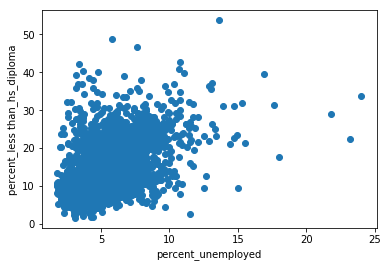

In [135]:
# Explore the unemployment rate and the percent not attaining a high school diploma over the time period
un_ed1 = pd.merge(ed, un, how='inner', on = ['fips','year'])
un_ed1
plt.scatter(un_ed1['percent_unemployed'],un_ed1['percent_less than_hs_diploma'])
plt.xlabel('percent_unemployed')
plt.ylabel('percent_less than_hs_diploma')